In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
sns.set(style='whitegrid')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train.shape

(381109, 12)

In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [8]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

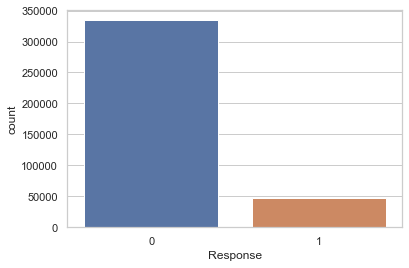

In [9]:
sns.countplot(train.Response)

In [10]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

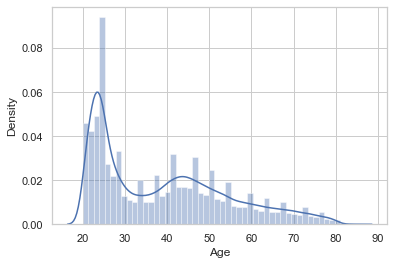

In [11]:
sns.distplot(train.Age)

<AxesSubplot:ylabel='Age'>

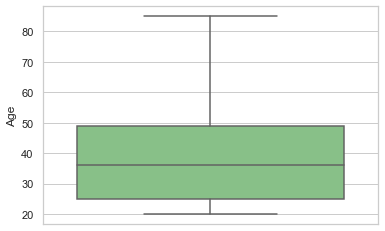

In [12]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

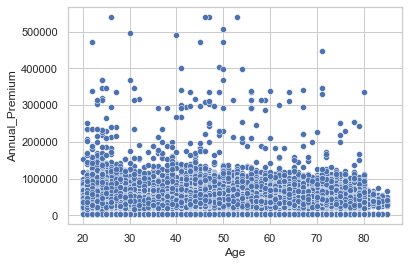

In [14]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

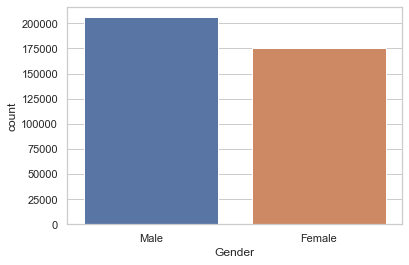

In [13]:
sns.countplot(train.Gender)

In [14]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

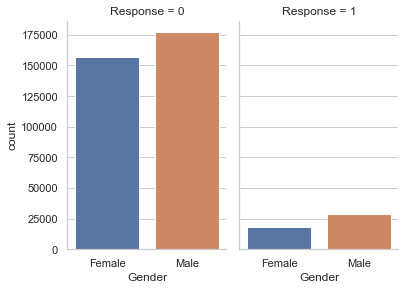

In [15]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [16]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

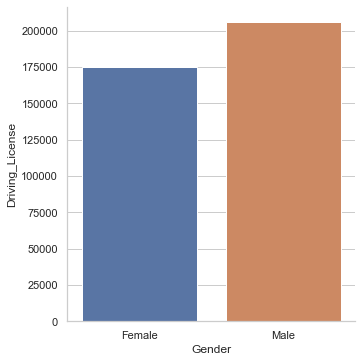

In [17]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

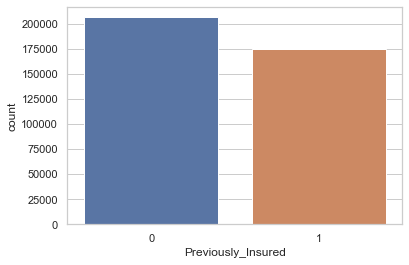

In [18]:
sns.countplot(train.Previously_Insured)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

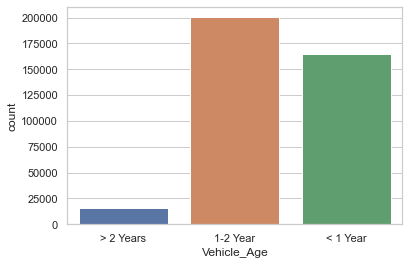

In [19]:
sns.countplot(train.Vehicle_Age)

## Data Pre-Processing 

In [20]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [21]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [22]:
train=pd.get_dummies(train,drop_first=True)

In [23]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [25]:
train=train.drop('id',axis=1)

In [26]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [27]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [29]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [30]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [31]:
id=test.id

In [32]:
test=test.drop('id',axis=1)

## Data Modelling and Evaluation 

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV

## Data Preparation 

In [3]:
from sklearn.preprocessing import LabelEncoder 
labelEncoder= LabelEncoder()
train['Gender'] = labelEncoder.fit_transform(train['Gender'])
train['Vehicle_Age'] = labelEncoder.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = labelEncoder.fit_transform(train['Vehicle_Damage'])

In [4]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [5]:
# checking for duplicates 

duplicate_check=train[train.duplicated()]
print(duplicate_check)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


In [6]:
# Creating Independent and dependent variables

X=train.drop(['Response','id'],axis=1) 
y=train['Response']     

In [7]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [8]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

### Handling Imbalanced Data 

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

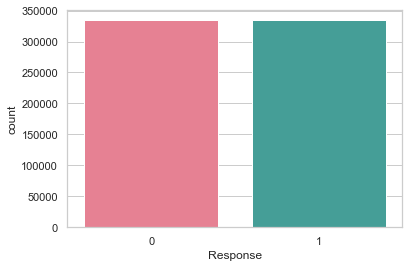

In [9]:
from imblearn.over_sampling import SMOTE

sm=  SMOTE()
X_new,y_new=sm.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [10]:
from sklearn.model_selection import train_test_split

#Training and Test Data for Model Selection
X_train, X_test, y_train, y_test= train_test_split(X_new, y_new, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#Data Pre-Processing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(501598, 10) (167200, 10) (501598,) (167200,)


### Model Selection and Perfromance 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

model=LogisticRegression()
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,y_pred)
recall_lr=recall_score(y_test,y_pred)
precision_lr=precision_score(y_test,y_pred)
f1score_lr=f1_score(y_test,y_pred)
AUC_LR=roc_auc_score(y_pred,y_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7864114832535886
ROC_AUC Score: 0.805852319663495


In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.88      0.76     62581
           1       0.91      0.73      0.81    104619

    accuracy                           0.79    167200
   macro avg       0.79      0.81      0.78    167200
weighted avg       0.82      0.79      0.79    167200



### ROC Curve for Logistic Regression  

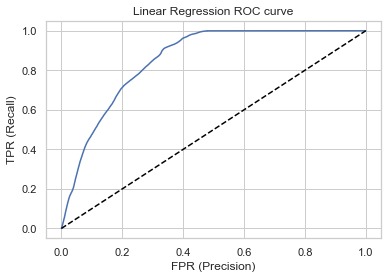

In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

model_1=LogisticRegression(penalty='l2', solver='liblinear')
model_1=model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_test)
lr_probability =model_1.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,y_pred_1)
recall_lr=recall_score(y_test,y_pred_1)
precision_lr=precision_score(y_test,y_pred_1)
f1score_lr=f1_score(y_test,y_pred_1)
AUC_LR=roc_auc_score(y_pred_1,y_test)

print("Accuracy : ", accuracy_score(y_test,y_pred_1))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7864174641148325
ROC_AUC Score: 0.8058606734479083


There is no impact of penalty on the Logistic Regression Model and the ROC_AUC score of the model

### Random Forest Classifier 

In [15]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred_rf = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



AUC_RF=roc_auc_score(y_pred_rf,y_test)
acc_rf=accuracy_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
f1score_rf=f1_score(y_test,y_pred_rf)

print(accuracy_score(y_pred_rf,y_test))
print("ROC_AUC Score:",AUC_RF)

0.8865669856459331
ROC_AUC Score: 0.8872474999577966


In [16]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     80141
           1       0.91      0.87      0.89     87059

    accuracy                           0.89    167200
   macro avg       0.89      0.89      0.89    167200
weighted avg       0.89      0.89      0.89    167200



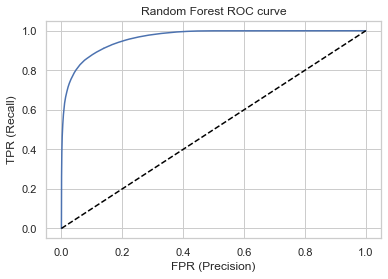

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

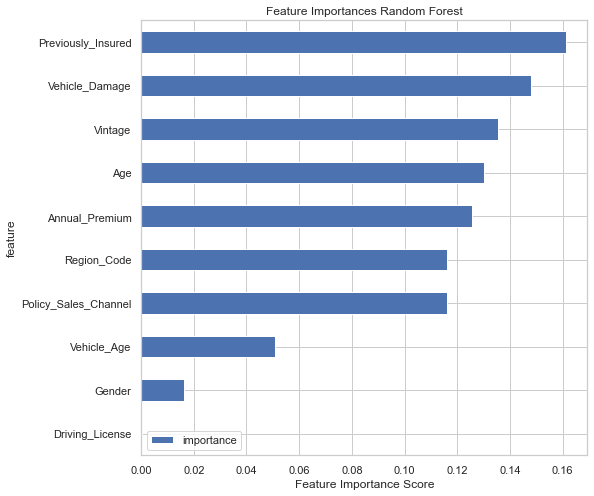

In [18]:
title="Feature Importances Random Forest"
feat_imp = pd.DataFrame({'importance':randomforest.feature_importances_}) 
feat_imp['feature'] = X_new.columns
feat_imp.sort_values(by='importance', ascending=True, inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

### LightGBM Model


In [19]:
import time
start_time = time.time()

import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
y_pred_lgb=lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
LGB_probability = lgb_clf.predict_proba(X_test)[:,1]

AUC_LGB=roc_auc_score(y_pred_lgb,y_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_lgb))
print("ROC_AUC Score:",AUC_LGB)

Accuracy :  0.8783552631578947
ROC_AUC Score: 0.8792115194039252


In [20]:
acc_lgb=accuracy_score(y_test,y_pred_lgb)
recall_lgb=recall_score(y_test,y_pred_lgb)
precision_lgb=precision_score(y_test,y_pred_lgb)
f1score_lgb=f1_score(y_test,y_pred_lgb)

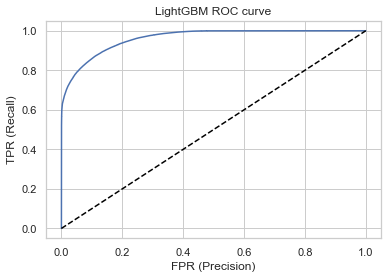

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, LGB_probability)

plt.title('LightGBM ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [22]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 144.66664600372314 seconds ---


In [23]:
import time
start_time = time.time()

import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(boosting_type='dart',n_estimators=500,learning_rate=0.01)
lgb_clf.fit(X_train, y_train)
y_pred_lgb=lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
AUC_LGB=roc_auc_score(y_pred_lgb,y_test)
LGB_probability = lgb_clf.predict_proba(X_test)[:,1]

print("Accuracy : ", accuracy_score(y_test, y_pred_lgb))
print("ROC_AUC Score:",AUC_LGB)

Accuracy :  0.8346172248803828
ROC_AUC Score: 0.8437582297683092


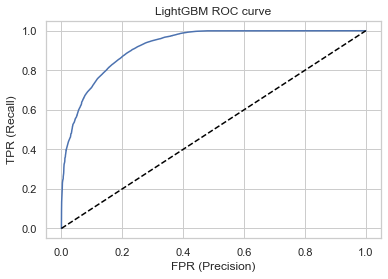

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, LGB_probability)

plt.title('LightGBM ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### XGBoost Clasifier 

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_pred_xgb = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_pred_xgb)
recall_xgb=recall_score(y_test,y_pred_xgb)
precision_xgb=precision_score(y_test,y_pred_xgb)
f1score_xgb=f1_score(y_test,y_pred_xgb)

AUC_xgb=roc_auc_score(y_pred_xgb,y_test)


print(accuracy_score(y_pred_xgb,y_test))
print("ROC_AUC Score:",AUC_xgb)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8939473684210526
ROC_AUC Score: 0.8939670059777204


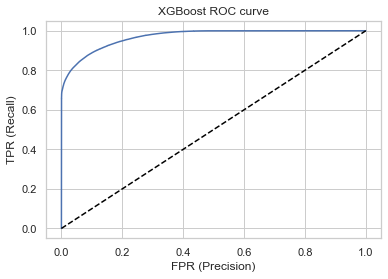

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### CatBoost Model 

In [27]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations=5, learning_rate=0.1, #loss_function='CrossEntropy'
                        )
cat_clf.fit(X_train,y_train)
y_pred_cat=cat_clf.predict(X_test)
cat_accuracy = accuracy_score(y_test, y_pred_cat)
AUC_CAT=roc_auc_score(y_pred_cat,y_test)
CAT_probability = cat_clf.predict_proba(X_test)[:,1]

print("Accuracy : ", accuracy_score(y_test, y_pred_cat))
print("ROC_AUC Score:",AUC_CAT)

0:	learn: 0.6495091	total: 382ms	remaining: 1.53s
1:	learn: 0.6136639	total: 609ms	remaining: 914ms
2:	learn: 0.5837863	total: 856ms	remaining: 571ms
3:	learn: 0.5586651	total: 1.16s	remaining: 289ms
4:	learn: 0.5375249	total: 1.43s	remaining: 0us
Accuracy :  0.8106698564593301
ROC_AUC Score: 0.828944902606435


In [28]:
acc_cat=accuracy_score(y_test,y_pred_cat)
recall_cat=recall_score(y_test,y_pred_cat)
precision_cat=precision_score(y_test,y_pred_cat)
f1score_cat=f1_score(y_test,y_pred_cat)

AUC_cat=roc_auc_score(y_pred_cat,y_test)

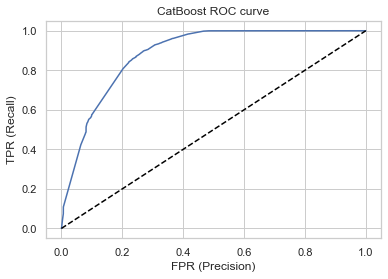

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, CAT_probability)

plt.title('CatBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [30]:
ind=['Logistic regression','Randomforest','XGBClassifier','LGBM Classifier', 'CatBoost Classifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb,acc_lgb,acc_cat],"Recall":[recall_lr,recall_rf,recall_xgb,recall_lgb,recall_cat],"Precision":[precision_lr,precision_rf,precision_xgb,precision_lgb,precision_cat],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb,f1score_lgb,f1score_cat],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb,AUC_LGB,AUC_cat]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.786417,0.912485,0.728532,0.810198,0.805861
Randomforest,0.886567,0.907601,0.870800,0.888820,0.887247
XGBClassifier,0.893947,0.890469,0.896544,0.893496,0.893967
LGBM Classifier,0.878355,0.902178,0.860978,0.881097,0.843758
CatBoost Classifier,0.810670,0.928564,0.751199,0.830517,0.828945


In [31]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(border_count= 32, 
                             depth= 3, 
                             iterations= 250, 
                             l2_leaf_reg= 1, 
                             learning_rate=0.03, 
                             thread_count= 4, verbose=False)
cat_clf.fit(X_train,y_train)
y_pred_cat=cat_clf.predict(X_test)
cat_accuracy = accuracy_score(y_test, y_pred_cat)
AUC_CAT=roc_auc_score(y_pred_cat,y_test)
CAT_probability = cat_clf.predict_proba(X_test)[:,1]

print("Accuracy : ", accuracy_score(y_test, y_pred_cat))
print("ROC_AUC Score:",AUC_CAT)

Accuracy :  0.8316686602870813
ROC_AUC Score: 0.8444360570679995
